In [1]:
import pandas
import matplotlib
import seaborn

%matplotlib inline

In [2]:
FIG_SIZE = (6, 3)
PALETTE = seaborn.color_palette()
PAL_SEC = seaborn.color_palette('Paired')
PAL_REL = {k:v for k,v in zip(
    ['major', 'minor', 'patch'], [seaborn.color_palette('muted')[i] for i in [1, 0, 2]]
)}

In [3]:
matplotlib.rcParams['figure.figsize'] = FIG_SIZE
matplotlib.rcParams['text.latex.preamble'] = [r'\usepackage{amsmath}']

def _savefig(fig, name):
    fig.savefig(
        os.path.join(FIGURE_PATH, '{}.pdf'.format(name)),
        bbox_inches='tight'
    )

# Disable figure export
SAVEFIG = False
savefig = _savefig if SAVEFIG else lambda x, y: None

## Load data

In [4]:
df_required = (
    pandas.read_csv(
        '../data/required.csv.gz',
        parse_dates=['date'], 
        infer_datetime_format=True,   
    )
)

df_required

,package,version,major,minor,patch,rank,date,rank_date,backported,backported_from
0,0x.js,0.6.1,0.0,6.0,1.0,1,2017-06-20 07:07:49,1,False,NaN
1,0x.js,0.6.2,0.0,6.0,2.0,2,2017-06-21 13:37:13,2,False,NaN
2,0x.js,0.7.0,0.0,7.0,0.0,3,2017-06-22 23:20:18,3,False,NaN
3,0x.js,0.7.1,0.0,7.0,1.0,4,2017-06-26 22:31:57,4,False,NaN
4,0x.js,0.8.0,0.0,8.0,0.0,5,2017-07-05 02:01:37,5,False,NaN
...,...,...,...,...,...,...,...,...,...,...
157734,zxcvbn,4.2.0,4.0,2.0,0.0,21,2015-11-20 21:54:26,21,False,NaN
157735,zxcvbn,4.3.0,4.0,3.0,0.0,22,2016-05-04 02:26:38,22,False,NaN
157736,zxcvbn,4.4.0,4.0,4.0,0.0,23,2016-09-24 23:55:01,23,False,NaN
157737,zxcvbn,4.4.1,4.0,4.0,1.0,24,2016-10-31 22:00:41,24,False,NaN


In [5]:
df_dependents = (
    pandas.read_csv(
        '../data/dependents.csv.gz',
        parse_dates=['date'],
        infer_datetime_format=True,
    )
)

df_dependents

,source,version,date,target,constraint,interval,selected,c_empty,c_dev,c_major,c_minor,c_patch
0,0-1-project,0.0.1,2018-12-10 06:44:08,chai,^4.2.0,"[4.2.0,5.0.0)",71.0,False,False,False,True,True
1,0-1-project,0.0.1,2018-12-10 06:44:08,vue,^2.5.17,"[2.5.17,3.0.0)",144.0,False,False,False,True,True
2,0-1-project,0.0.1,2018-12-10 06:44:08,vue-hot-reload-api,^2.3.1,"[2.3.1,3.0.0)",30.0,False,False,False,True,True
3,0-1-project,0.0.1,2018-12-10 06:44:08,vue-template-compiler,^2.5.17,"[2.5.17,3.0.0)",60.0,False,False,False,True,True
4,00.demo,1.0.0,2018-08-11 02:15:29,chalk,^2.1.0,"[2.1.0,3.0.0)",23.0,False,False,False,True,True
...,...,...,...,...,...,...,...,...,...,...,...,...
736567,zzzd,1.0.0,2018-08-10 08:32:47,vuedraggable,^2.16.0,"[2.16.0,3.0.0)",25.0,False,False,False,True,True
736568,zzzd,1.0.0,2018-08-10 08:32:47,vuex,^3.0.1,"[3.0.1,4.0.0)",32.0,False,False,False,True,True
736569,zzzzhy,1.0.4,2018-07-09 09:16:20,react,^16.4.0,"[16.4.0,17.0.0)",84.0,False,False,False,True,True
736570,zzzzhy,1.0.4,2018-07-09 09:16:20,react-dom,^16.4.0,"[16.4.0,17.0.0)",52.0,False,False,False,True,True


## Dataset overview

### Some statistics

In [6]:
print('Number of required packages:', len(df_required.drop_duplicates('package')))
print('Number of releases:', len(df_required))
print('Oldest release:', df_required.date.min())
print()
print('Number of dependent packages:', len(df_dependents.drop_duplicates('source')))
print('Number of dependencies:', len(df_dependents))
print()
print('Number of backports:', len(df_required[lambda d: d['backported']]))
print('Number of packages with backports:', len(df_required[lambda d: d['backported']].drop_duplicates('package')))

Number of required packages: 4451
Number of releases: 157739
Oldest release: 2010-11-09 23:36:08

Number of dependent packages: 169455
Number of dependencies: 736572

Number of backports: 3010
Number of packages with backports: 432


### Number of dependents

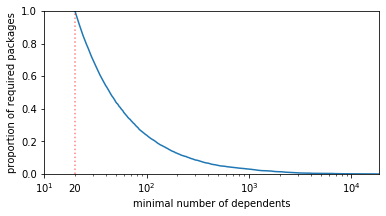

In [42]:
fig, ax = matplotlib.pyplot.subplots()

data = (
    df_dependents
    .groupby('target')
    [['source']]
    .count()
    .assign(target=1)
    .sort_values('source', ascending=False)
    .groupby('source', sort=False)
    .sum()
    .cumsum()
    .pipe(lambda df: df / df_dependents.target.nunique())
)

data.plot(legend=False, color=PALETTE[0], ax=ax)
ax.axvline(20, 0, 1, linestyle=':', color='r', alpha=0.5)
ax.text(20, -0.06, '20', va='top', ha='center')

ax.set(
    xlabel='minimal number of dependents',
    xscale='log',
    xlim=(10, None),
    ylabel='proportion of required packages',
    ylim=(0, 1),
)
ax.acorr
savefig(fig, 'overview_dependents')

In [36]:
pandas.concat(
    (data.reset_index()[lambda d: d['target'] >= p].iloc[0] for p in pandas.np.arange(0, 1, 0.1)),
    axis=1
).T.set_index('target').T

target,0.000225,0.100427,0.201977,0.302404,0.402831,0.509548,0.609077,0.700966,0.820714,0.918670
source,18523.0,259.0,121.0,77.0,56.0,43.0,35.0,30.0,25.0,22.0


### Evolution of the number of considered required packages

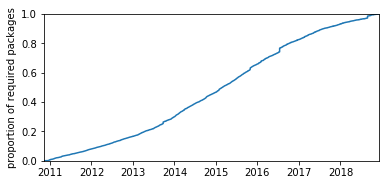

In [60]:
fig, ax = matplotlib.pyplot.subplots()
fig.set_size_inches(FIG_SIZE)

data = (
    df_required
    .sort_values('rank_date')
    .drop_duplicates('package', keep='first')
    .groupby('date')
    [['package']]
    .count()
    .cumsum()
)

(data / len(df_required.drop_duplicates('package'))).plot(color=PALETTE[0], legend=False, ax=ax)

ax.set(
    xlabel='',
    ylabel='proportion of required packages',
    ylim=(0, 1)
)
fig.autofmt_xdate(bottom=0.2, rotation=0, ha='center')

savefig(fig, 'overview_required')

## How frequently are packages updated?

### Time between updates

(for required packages)

### Major frequency (time and updates)

### Stability index

e.g. ratio time between major / time between non-major?

## How many versions are required?

### Softness of dependency constraints

### Number of available/required versions

### Number of required packages w.r.t. required versions

### Reuse index

e.g. Gini index dependents:releases

### Release type of required versions

e.g. latest, a previous major, a previous minor, a previous patch.

### Time lag of required versions

### Number of available/required major

### Number of required packages w.r.t. number of required majors

### Major reuse index

e.g. Gini index dependents:major

## How prevalent are backports?

### Number of packages with backports

### Number of backported releases

### Relation with number of required major?

### Backport coverage

e.g. proportion of dependents using either the highest major or a major with a backport

## Relation between metrics

### Correlation between metrics

## Which releases are backported?

### Type of backports

### Type of backported releases

## How long to backport releases?

In terms of time and #updates.

### Since last update, compared to other releases

### Since latest major

e.g. since 3.0.0 for a 2.0.1 backport, assuming 3.2.1 is latest.

### Since last release in current major

e.g. since 2.0.0 for a 2.0.1 backport, assuming 2.0.0 was the latest before 3.0.0.

## Tooling & metrics

### Tool: Show library usage

### Tool: Show update "impact"